In [2]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sp_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/SP500_raw.csv')

# Convert exchange rate to a number, with coersion to throw NA's if conversion not possible
sp_data['price'] = pd.to_numeric(sp_data.SP500, errors='coerce')

# Remove NA's
sp_data.dropna(inplace=True)

In [16]:
sp_data.head()

,DATE,SP500,price,diff_1
DATE,,,,
2008-01-02,2008-01-02,1447.16,1447.16,NaN
2008-01-03,2008-01-03,1447.16,1447.16,0.00
2008-01-04,2008-01-04,1411.63,1411.63,-35.53
2008-01-07,2008-01-07,1416.18,1416.18,4.55
2008-01-08,2008-01-08,1390.19,1390.19,-25.99


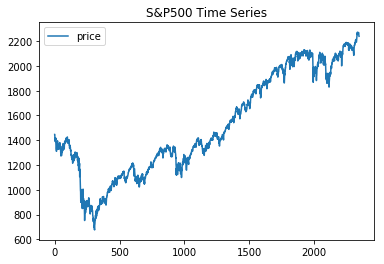

In [4]:
sp_data.plot()
plt.title('S&P500 Time Series')
plt.show()

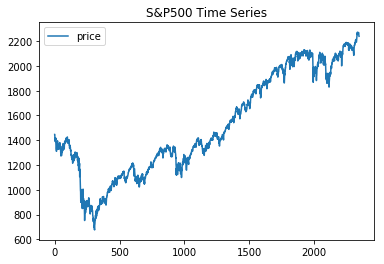

In [5]:
sp_data.plot()
plt.title('S&P500 Time Series')
plt.show()

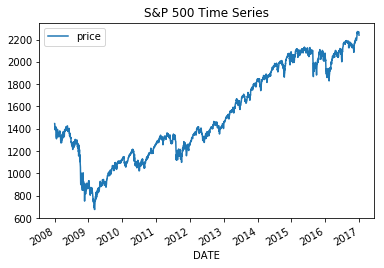

In [6]:
sp_data.index = pd.to_datetime(sp_data.DATE)
sp_data.plot()
plt.title('S&P 500 Time Series')
plt.show()

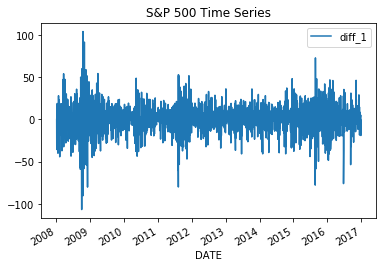

In [7]:
sp_data['diff_1'] = sp_data.price - sp_data.price.shift()
sp_data.plot(y='diff_1')
plt.title('S&P 500 Time Series')
plt.show()

Text(0.5,1,'S&P PACF')

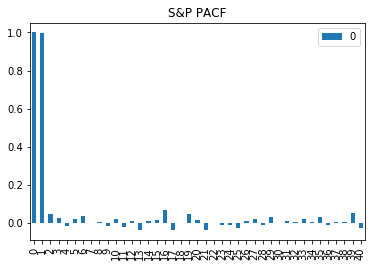

In [8]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(sp_data.price))
x_acf.plot(kind='bar')
plt.title("S&P PACF")

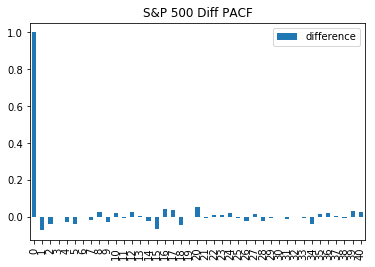

In [9]:
x_acf = pd.DataFrame(pacf(sp_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("S&P 500 Diff PACF")
plt.legend(['difference'])

In [10]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

C:\Users\willd\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\willd\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2266
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -9602.159
Method:                           css   S.D. of innovations             16.753
Date:                Mon, 17 Dec 2018   AIC                          19208.317
Time:                        08:57:59   BIC                          19219.769
Sample:                             1   HQIC                         19212.496
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3494      0.352      0.993      0.321      -0.340       1.039
Residuals Description
count    2.266000e+03
mean     5.054699e-15
std      1.675631e+01
min     -1.069694e+02
25%     -7.314369e+00

In [11]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

C:\Users\willd\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2267
Model:                     ARMA(1, 0)   Log Likelihood               -9609.725
Method:                       css-mle   S.D. of innovations             16.753
Date:                Mon, 17 Dec 2018   AIC                          19225.449
Time:                        08:58:17   BIC                          19242.628
Sample:                             0   HQIC                         19231.717
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1700.3163    334.193      5.088      0.000    1045.309    2355.323
ar.L1.price     0.9993      0.001   1569.718      0.000       0.998       1.001
                                    Roots       

In [12]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

C:\Users\willd\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2267
Model:                     ARMA(1, 1)   Log Likelihood               -9603.247
Method:                       css-mle   S.D. of innovations             16.705
Date:                Mon, 17 Dec 2018   AIC                          19214.494
Time:                        09:08:20   BIC                          19237.399
Sample:                             0   HQIC                         19222.851
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1707.0554    344.188      4.960      0.000    1032.460    2381.651
ar.L1.price     0.9994      0.001   1778.952      0.000       0.998       1.000
ma.L1.price    -0.0787      0.022     -3.614    

In [13]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(sp_data.price, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

C:\Users\willd\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\willd\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2266
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9592.974
Method:                       css-mle   S.D. of innovations             16.685
Date:                Mon, 17 Dec 2018   AIC                          19193.947
Time:                        09:09:03   BIC                          19216.850
Sample:                             1   HQIC                         19202.304
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3529      0.289      1.222      0.222      -0.213       0.919
ar.L1.D.price     0.5832      0.155      3.765      0.000       0.280       0.887
ma.L1.D.price    -0.6565      0.144     

In [14]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(5,1,5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

C:\Users\willd\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\willd\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\willd\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2266
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -9588.127
Method:                       css-mle   S.D. of innovations             16.625
Date:                Mon, 17 Dec 2018   AIC                          19200.254
Time:                        09:11:14   BIC                          19268.964
Sample:                             1   HQIC                         19225.324
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3354      0.287      1.169      0.243      -0.227       0.898
ar.L1.D.price    -0.7551      0.143     -5.274      0.000      -1.036      -0.475
ar.L2.D.price    -0.4471      0.196     

Text(0.5,1,'Histogram of Residuals')

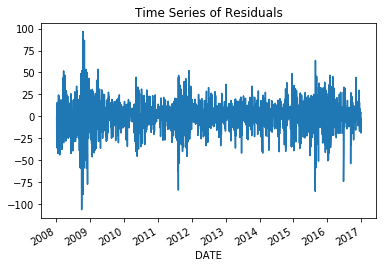

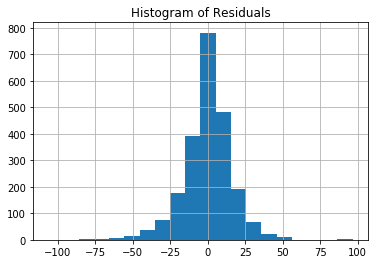

In [15]:
residuals = pd.DataFrame(model_111_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

Interpretting the ARIMA (1,0,1)

Before we move on to the Challenge for this section, let's return to model interpretation. We've spent this time building models, but we haven't really talked about what our output means. Our ARIMA(1,0,1) is makes a good example for a quick interpretation.

Firstly, the constant is approximately 1700. Then each day is approximately equal to the previous day's value. This is explained through the AR1 coefficient being approximately .9994. The moving average term is approximately .08, meaning that it will move against the previous error by about 8%. These two combine to show a is steadily at the same level as the previous value, but compensating back slightly against any error.

Can you interpret the output of one of the other models? What about ARIMA(1,1,1)? Which do you prefer? Then try some of your own coefficients below.

In [ ]:
'''                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.price   No. Observations:                 2266
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9592.974
Method:                       css-mle   S.D. of innovations             16.685
Date:                Mon, 17 Dec 2018   AIC                          19193.947
Time:                        09:09:03   BIC                          19216.850
Sample:                             1   HQIC                         19202.304
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3529      0.289      1.222      0.222      -0.213       0.919
ar.L1.D.price     0.5832      0.155      3.765      0.000       0.280       0.887
ma.L1.D.price    -0.6565      0.144     -4.558      0.000      -0.939      -0.374'''

In the ARIMA(1,1,1) model, it is saying that each day the price will be equal to:
    # .3529 + .58(autoregressive component) +(-.65)( Moving average component)
    

In [ ]:
Where

Comparing Models with AIC

Now we've generated a series of models, which one works best?

Well, one of the easiest ways to compare time series models is with something called Akaike Information Criteria, or AIC. AIC is a measure of the degree of information contained in the model, if you recall some of our discussions of information theory in the Decision Tree section.

Now, conveniently statsmodels calculates AIC for us (You can look more at that calculation starting here. We want to minimize the value of the AIC. The model with the lowest AIC is likely the best model to choose. How much better is calculated using the ratios of AIC's.

When comparing to our minimal AIC, other models are compared in the context of information loss. We calculated the probability that another model minimizes information loss. That calculation is:

exp((AICmin−AICx)/2)
exp((AICmin−AICx)/2)

This gives our probability of having lost less information with the other model.

For our examples, ARIMA(1,1,1) has an AIC of 19193. Our worst model has an AIC of 19225 (It's our ARIMA(1,0,0) or AR(1) model). But how do they compare?

It turns out, when doing the above calculation, we get a probability of 1.125e-7 that we lost less information in our AR(1) model. That is a big difference and suggests that ARIMA(1,1,1) is a much better model.

Compare the other models to ARIMA(1,1,1) below.


Model
- 5,1,5 AIC= 19200.254
- 1,0,0 AIC= 19225.449
- 0,1,0 AIC = 19208.317
- 1,1,1 AIC 19193.947
- 1,0,1 AIC 19214.494

In [20]:
models = [(0,1,0),(1,0,0),(1,0,1),(5,1,5)]
AICs = [ 19208, 19225, 19214, 19200]
min_mod = (1,1,1)
min_score = 19193

for model,aic in zip(models,AICs):
    print('\n{} vs: {}'.format(min_mod,model))
    print(np.e**((min_score - aic)/2))


(1, 1, 1) vs: (0, 1, 0)
0.0005530843701478338

(1, 1, 1) vs: (1, 0, 0)
1.1253517471925921e-07

(1, 1, 1) vs: (1, 0, 1)
2.753644934974717e-05

(1, 1, 1) vs: (5, 1, 5)
0.030197383422318508
